In [1]:
import matplotlib.pyplot as plt
import torch
from torch.distributions import Normal

In [2]:
# https://rstudio-pubs-static.s3.amazonaws.com/287838_7c982110ffe44d1eb5184739c5724926.html
def quotient_distribution(z, b, p, d_y):
    frac_1 = p / (torch.pi * (1 + ((p ** 2) * (z ** 2))))

    frac_2_sum_1 = torch.exp(-(((p ** 2) * (b ** 2)) + 1) / (2 * (d_y ** 2)))

    q = (1 + (b * (p ** 2) * z)) / (d_y * torch.sqrt(1 + ((p ** 2) * (z ** 2))))

    frac_2_sum_2_1 = torch.sqrt(torch.tensor(torch.pi / 2)) * q * torch.erf(q / torch.sqrt(torch.tensor(2)))

    frac_2_sum_2_2 = torch.exp(-((p ** 2) * ((z - b) ** 2)) / (2 * (d_y ** 2) * (1 + ((p ** 2) * (z ** 2)))))

    frac_2_sum_2 = frac_2_sum_2_1 * frac_2_sum_2_2

    frac_2 = frac_2_sum_1 + frac_2_sum_2

    return frac_1 * frac_2

def mu_logvar_to_quotient(z, mu_1, logvar_1, mu_2, logvar_2):
    b = mu_1 / mu_2
    p = logvar_2.exp().sqrt() / logvar_1.exp().sqrt()
    d_y = logvar_2.exp().sqrt() / mu_2

    return quotient_distribution(z, b, p, d_y)

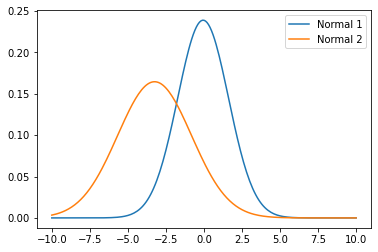

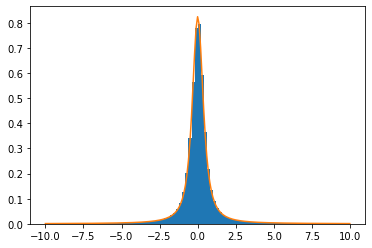

Mean: -0.569
Std: 769.812
Min: -697554.625
Max: 200433.250


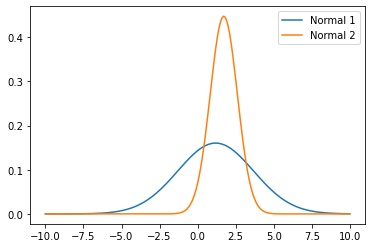

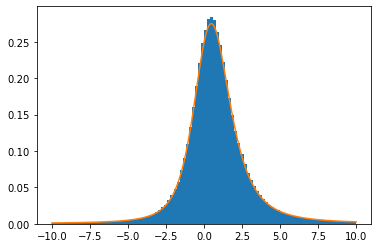

Mean: 2.015
Std: 1231.865
Min: -53484.816
Max: 1222674.250


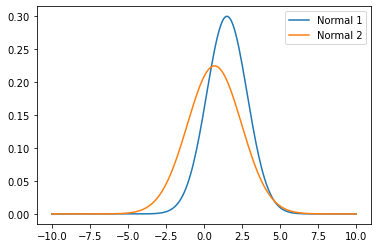

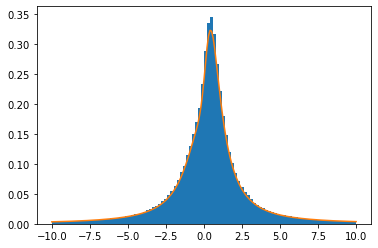

Mean: -0.770
Std: 1237.433
Min: -1082217.000
Max: 264621.750


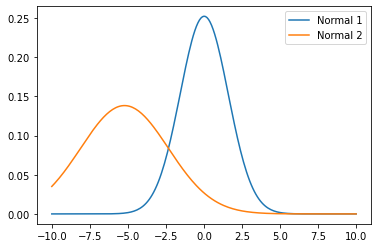

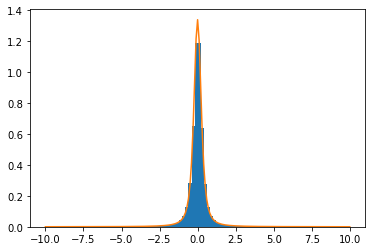

Mean: -3.583
Std: 3409.054
Min: -3404901.250
Max: 16848.395


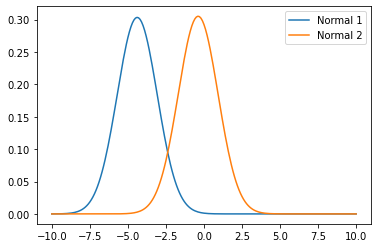

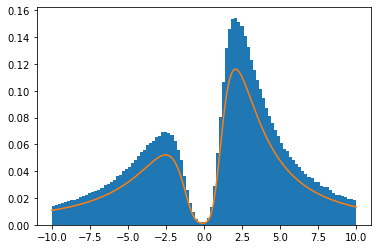

Mean: -23.303
Std: 21146.334
Min: -20989120.000
Max: 549631.188


In [3]:
# Randomly generate n normal distributions

n = 5

mu_1, mu_2 = torch.randn(n) * 5, torch.randn(n) * 5
var_1, var_2 = torch.abs(torch.randn(n) * 5), torch.abs(torch.randn(n) * 5)
logvar_1, logvar_2 = var_1.log(), var_2.log()

N_1, N_2 = Normal(mu_1, var_1.sqrt()), Normal(mu_2, var_2.sqrt())


# Get m samples of the quotient

m = int(1e6)

experiments = N_1.sample(torch.Size([m])) / N_2.sample(torch.Size([m]))

limit = 10
X = torch.linspace(-limit, limit, 201)
X_repeat = X.repeat(5, 1).T
N_1_prob, N_2_prob = N_1.log_prob(X_repeat).exp(), N_2.log_prob(X_repeat).exp()

for i in range(n):
    # Plot the normals
    plt.plot(X, N_1_prob[:, i], label="Normal 1")
    plt.plot(X, N_2_prob[:, i], label="Normal 2")
    plt.legend()
    plt.show()

    # Plot their quotient
    plt.hist(experiments[:, i], bins=100, range=(-limit, limit), density=True)
    Y = mu_logvar_to_quotient(X, mu_1[i], logvar_1[i], mu_2[i], logvar_2[i])
    plt.plot(X, Y)
    plt.show()

    print(f"Mean: {experiments[:, i].mean():.3f}")
    print(f"Std: {experiments[:, i].std():.3f}")
    print(f"Min: {experiments[:, i].min():.3f}")
    print(f"Max: {experiments[:, i].max():.3f}")